In [34]:
import pandas as pd
import os
import matplotlib.pyplot as mp

from itertools import combinations
from collections import Counter

In [11]:
#importing and creating all csv to a single file

In [35]:
files_df = [pd.read_csv(f"./Sales_Data/{file}") for file in os.listdir('./Sales_Data')]
merged_file = pd.DataFrame()

for file in files_df:
    merged_file = pd.concat([merged_file, file])

merged_file.to_csv('total_sales.csv', index=False)

In [7]:
#reading all data csv and cleaning NaN

In [36]:
# df = pd.read_csv("all_data.csv")
df = pd.read_csv("total_sales.csv")
df = df.dropna(how="all")
#parse_dates does not work coz of unclean data

In [ ]:
#cleaning data 

In [37]:
df.insert(5,'Month', df['Order Date'].str[0:2])
df = df[df['Month'] != 'Or']
df['Month'] = df['Month'].astype('int8')

headers = list(df.columns.values)
for h in headers:
    df = df[df[h] != h]

In [ ]:
#creating a Sales column and finding the highest sales month

In [38]:
df.insert(4, 'Sales', df['Quantity Ordered'].astype('int32') * df['Price Each'].astype('float'))
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Month,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,1700.00,12/30/19 00:01,12,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,600.00,12/29/19 07:03,12,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,11.95,12/12/19 18:21,12,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,149.99,12/22/19 15:13,12,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,11.95,12/18/19 12:38,12,"43 Hill St, Atlanta, GA 30301"


In [39]:
sales_summary = df.groupby('Month').sum()
# sales_summary

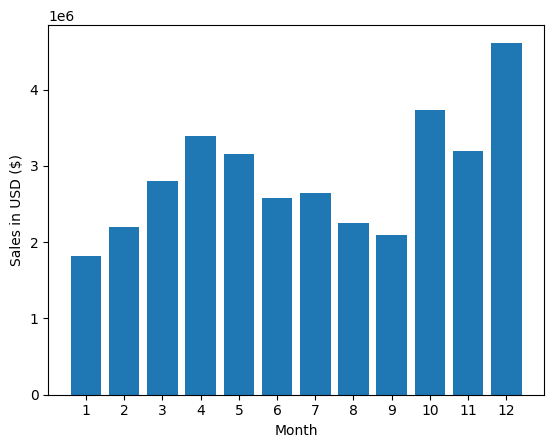

In [40]:
mp.bar(range(1,13), sales_summary['Sales'])
mp.xticks(range(1,13))
mp.xlabel('Month')
mp.ylabel('Sales in USD ($)')
mp.show()

#INFERENCE
#The Month of December has the Highest sales record in terms of months

In [ ]:
#finding city that has highest sales

In [41]:
df["City"] = df['Purchase Address'].str.split(',').str[1] + df['Purchase Address'].str.split(',').str[2].str[0:3]

In [42]:
city_sales = df.groupby('City').sum()
city_sales

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Month,Purchase Address
City,,,,,,,,
Atlanta GA,2956692956932957102957372957372957562957602957...,USB-C Charging CableWired HeadphonesAAA Batter...,1111111111111111111111111111112211111111111111...,11.9511.992.9970014.95379.9999.9914.9511.952.9...,2795498.58,12/18/19 12:3812/16/19 16:4012/26/19 19:0912/1...,104794,"43 Hill St, Atlanta, GA 30301856 12th St, Atla..."
Austin TX,2956802957022957032957032957542957892957982958...,Lightning Charging CableWired HeadphonesAA Bat...,1211111111111122111112111221111112111212111111...,14.9511.993.8499.9914.9514.9511.9911.95109.997...,1819581.75,12/01/19 14:3012/21/19 18:5012/17/19 12:2712/1...,69829,"338 Main St, Austin, TX 73301628 River St, Aus..."
Boston MA,2956772956812956812956812956812956872956952957...,AA Batteries (4-pack)Google PhoneUSB-C Chargin...,2111111111111111111111211111111111111111111111...,3.8460011.9599.9911.9915014.95149.9970014.9515...,3661642.01,12/20/19 19:1912/25/19 12:3712/25/19 12:3712/2...,141112,"866 Pine St, Boston, MA 0221579 Elm St, Boston..."
Dallas TX,2956722956732956742956782956792956942957242957...,USB-C Charging CableBose SoundSport Headphones...,2142112111111111111111131111111121111111112211...,11.9599.992.992.9911.9514.953.84379.992.996003...,2767975.40,12/13/19 09:2912/15/19 23:2612/28/19 11:5112/0...,104620,"813 Hickory St, Dallas, TX 75001718 Wilson St,..."
Los Angeles CA,2956762956882956912956922957062957142957162957...,ThinkPad LaptopApple Airpods HeadphonesBose So...,1112311111211111111111131111111111111111112111...,999.9915099.993.842.99700109.99149.993.8411.95...,5452570.80,12/28/19 17:1912/08/19 11:2112/22/19 18:3412/1...,208325,"410 Lincoln St, Los Angeles, CA 90001546 Park ..."
New York City NY,2956652956662956672956702956982956982957002957...,Macbook Pro LaptopLG Washing MachineUSB-C Char...,1111121111111111111111111112111111211111111111...,1700600.011.953.8440011.9599.9911.9911.9917009...,4664317.43,12/30/19 00:0112/29/19 07:0312/12/19 18:2112/3...,175741,"136 Church St, New York City, NY 10001562 2nd ..."
Portland ME,2956862957972958622960182961272961582962062962...,USB-C Charging CableWired HeadphonesAAA Batter...,1112111111211111111111114111111211131121111111...,11.9511.992.992.9911.9511.95389.99149.9911.951...,449758.27,12/17/19 16:1012/16/19 09:2312/03/19 14:2212/2...,17144,"573 Maple St, Portland, ME 04101163 Washington..."
Portland OR,2956712956822957342957572958192958572958922958...,USB-C Charging CableUSB-C Charging CableAAA Ba...,1111111111111111111111111141211112211111211111...,11.9511.952.993.8414.9511.9511.95149.9999.9915...,1870732.34,12/16/19 15:1012/23/19 19:2512/25/19 12:3812/0...,70621,"928 12th St, Portland, OR 97035780 Elm St, Por..."
San Francisco CA,2956682956752956832956842956852956892956962956...,27in FHD MonitorUSB-C Charging CableWired Head...,1214111111121113111223111111111111111111111111...,149.9911.9511.992.9911.99600.014.95999.9999.99...,8262203.91,12/22/19 15:1312/13/19 13:5212/23/19 22:4612/0...,315520,"410 6th St, San Francisco, CA 94016594 1st St,..."


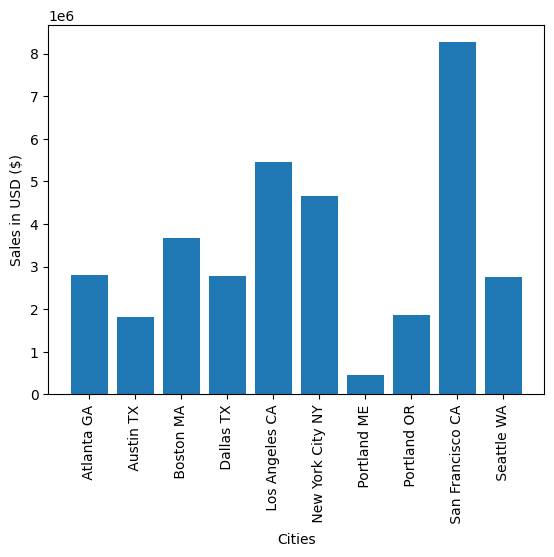

In [43]:
cities = [city for city, df in df.groupby('City')]

mp.bar(cities, city_sales['Sales'])
mp.xticks(cities, rotation='vertical')
mp.xlabel('Cities')
mp.ylabel('Sales in USD ($)')
mp.show()

#INFERENCE
#San Francisco has highest number of sales in terms of cities

In [ ]:
#Do some hypothesis testing for sales data 

In [ ]:
#what is the peak hour sale to show AD to customers

In [44]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

/var/folders/nb/lsb0ryhs7r985fs4vtjr25q80000gn/T/ipykernel_10872/3072535395.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'])


In [45]:
df.insert(6, 'Hour', df['Order Date'].dt.hour)
df.insert(7, 'Minute', df['Order Date'].dt.minute)
df.drop('Minute', inplace=True, axis=1)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Hour,Month,Purchase Address,City
0,295665,Macbook Pro Laptop,1,1700,1700.00,2019-12-30 00:01:00,0,12,"136 Church St, New York City, NY 10001",New York City NY
1,295666,LG Washing Machine,1,600.0,600.00,2019-12-29 07:03:00,7,12,"562 2nd St, New York City, NY 10001",New York City NY
2,295667,USB-C Charging Cable,1,11.95,11.95,2019-12-12 18:21:00,18,12,"277 Main St, New York City, NY 10001",New York City NY
3,295668,27in FHD Monitor,1,149.99,149.99,2019-12-22 15:13:00,15,12,"410 6th St, San Francisco, CA 94016",San Francisco CA
4,295669,USB-C Charging Cable,1,11.95,11.95,2019-12-18 12:38:00,12,12,"43 Hill St, Atlanta, GA 30301",Atlanta GA


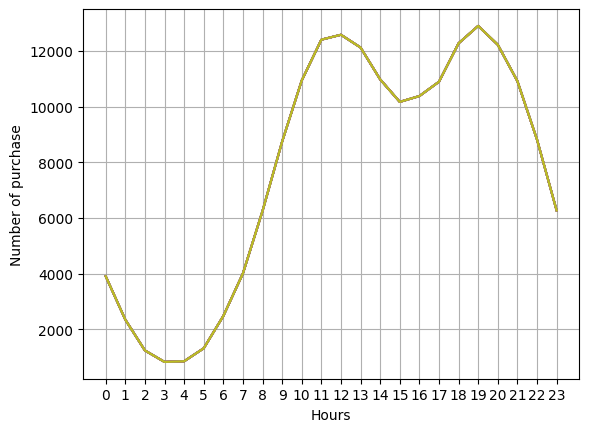

In [46]:
grp = df.groupby('Hour').count()

hours = [hour for hour, df in df.groupby('Hour')]

mp.plot(hours, grp)
mp.xticks(hours)
mp.xlabel('Hours')
mp.ylabel('Number of purchase')
mp.grid()
mp.show()


#INFERENCE
#Most purchases are done during the hours of 11AM-1PM and 5PM-7PM.
#Showing ADS just before this time would be the ideal decision.

In [ ]:
#What products are sold together most often?

In [47]:
fdf = df[df['Order ID'].duplicated(keep=False)]
fdf['Single List'] = fdf.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

/var/folders/nb/lsb0ryhs7r985fs4vtjr25q80000gn/T/ipykernel_10872/3064380924.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fdf['Single List'] = fdf.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [48]:
#removing the duplicates by comparing the value to the rows above
fdf = fdf[fdf['Order ID'] != fdf['Order ID'].shift(-1)]

In [49]:
counter = Counter()

for row in fdf['Single List']:
    row_items = row.split(',')
    counter.update(Counter(combinations(row_items, 2)))

print('Top 10 Most Common sold pair of items are \n')
for items, count in counter.most_common(10):
    print(f'{items[0]},{items[1]} : {count}')
    
#INFERENCE
#iphone and Lighning Charging Cables are most often purchased in pairs

Top 10 Most Common sold pair of items are 

iPhone,Lightning Charging Cable : 1005
Google Phone,USB-C Charging Cable : 987
iPhone,Wired Headphones : 447
Google Phone,Wired Headphones : 414
Vareebadd Phone,USB-C Charging Cable : 361
iPhone,Apple Airpods Headphones : 360
Google Phone,Bose SoundSport Headphones : 220
USB-C Charging Cable,Wired Headphones : 160
Vareebadd Phone,Wired Headphones : 143
Lightning Charging Cable,Wired Headphones : 92


In [ ]:
# Products that are most sold during holidays